In [1]:
import warnings
import numpy as np
import pandas as pd
import pylab as plot
import seaborn as sns
from IPython.core.display import HTML
from matplotlib import pyplot as plt

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");
% matplotlib inline
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

pd.options.display.max_columns = 100


params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)


# Data Loading 
train_values = pd.read_csv('./Data/train_values.csv', index_col ='patient_id')
train_labels = pd.read_csv('./Data/train_labels.csv', index_col ='patient_id')
test_values = pd.read_csv('./Data/test_values.csv', index_col ='patient_id')
combined = train_values.append(test_values)
print(train_values.shape)
print(train_labels.shape)


(180, 13)
(180, 1)


In [2]:
combined.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
combined.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,1.585185,131.344444,3.174074,0.670370,0.148148,1.022222,249.659259,1.05000,0.677778,54.433333,149.677778,0.329630
std,0.614390,17.861608,0.950090,0.943896,0.355906,0.997891,51.686237,1.14521,0.468195,9.109067,23.165717,0.470952
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.00000,0.000000,29.000000,71.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.000000,0.00000,0.000000,48.000000,133.000000,0.000000
50%,2.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.000000,0.80000,1.000000,55.000000,153.500000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,280.000000,1.60000,1.000000,61.000000,166.000000,1.000000
max,3.000000,200.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.20000,1.000000,77.000000,202.000000,1.000000


# Data Exploratory Analysis 

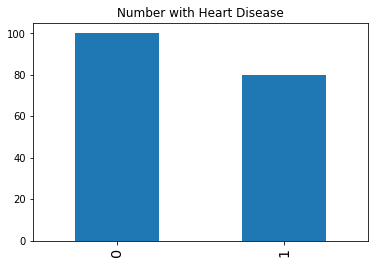

In [4]:
train_labels.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')

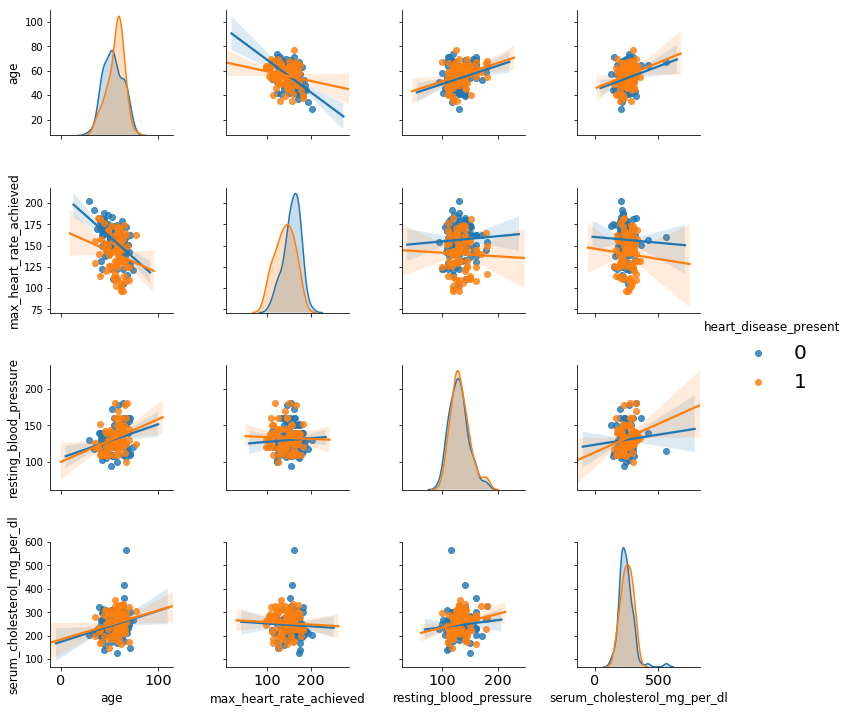

In [5]:
selected_features = ['age', 
                     'max_heart_rate_achieved', 
                     'resting_blood_pressure',
                     'serum_cholesterol_mg_per_dl']
train_values_subset = train_values[selected_features]


sns.pairplot(train_values.join(train_labels), 
             hue='heart_disease_present', 
             vars= train_values_subset,
             kind = 'reg',
             diag_kind = 'kde')

# Features Engineering 

In [6]:
combined['thal'] = combined['thal'].apply(lambda thal: 0 if thal == 'normal' else 1 if thal == 'reversible_defect' else 2)

In [7]:
combined.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,1.585185,0.488889,131.344444,3.174074,0.670370,0.148148,1.022222,249.659259,1.05000,0.677778,54.433333,149.677778,0.329630
std,0.614390,0.595730,17.861608,0.950090,0.943896,0.355906,0.997891,51.686237,1.14521,0.468195,9.109067,23.165717,0.470952
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.00000,0.000000,29.000000,71.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.000000,0.00000,0.000000,48.000000,133.000000,0.000000
50%,2.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.000000,0.80000,1.000000,55.000000,153.500000,0.000000
75%,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,280.000000,1.60000,1.000000,61.000000,166.000000,1.000000
max,3.000000,2.000000,200.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.20000,1.000000,77.000000,202.000000,1.000000


In [8]:
# outliers = combined.loc[combined['serum_cholesterol_mg_per_dl'] >= 300]
# outliers.describe()
combined['serum_cholesterol_mg_per_dl'] = combined['serum_cholesterol_mg_per_dl'].apply(lambda x: 300 if x >= 300 else x)

In [9]:
combined.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,1.585185,0.488889,131.344444,3.174074,0.670370,0.148148,1.022222,244.629630,1.05000,0.677778,54.433333,149.677778,0.329630
std,0.614390,0.595730,17.861608,0.950090,0.943896,0.355906,0.997891,40.365844,1.14521,0.468195,9.109067,23.165717,0.470952
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.00000,0.000000,29.000000,71.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.000000,0.00000,0.000000,48.000000,133.000000,0.000000
50%,2.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.000000,0.80000,1.000000,55.000000,153.500000,0.000000
75%,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,280.000000,1.60000,1.000000,61.000000,166.000000,1.000000
max,3.000000,2.000000,200.000000,4.000000,3.000000,1.000000,2.000000,300.000000,6.20000,1.000000,77.000000,202.000000,1.000000


In [10]:
combined = (combined - combined.mean()) / combined.std()
combined.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,-0.952466,-0.820655,-0.187242,-1.235750,-0.710216,-0.416256,0.979844,1.371713,-0.916863,0.688222,-1.035598,0.877254,-0.699923
ryoo3j,0.675165,-0.820655,-1.194990,-0.183219,-0.710216,-0.416256,-1.024382,-0.758801,0.480261,-1.447639,-0.047572,0.359247,-0.699923
yt1s1x,-0.952466,-0.820655,-0.355200,0.869313,2.468099,-0.416256,0.979844,1.371713,-0.916863,0.688222,2.477385,0.531916,1.423438
l2xjde,-0.952466,0.857957,1.156422,0.869313,-0.710216,-0.416256,-1.024382,-0.535840,-0.916863,0.688222,-1.584502,1.352094,-0.699923
oyt4ek,2.302797,0.857957,2.612058,-2.288282,-0.710216,-0.416256,0.979844,0.628511,2.750588,0.688222,0.501332,-0.201927,-0.699923


In [11]:
from sklearn.model_selection import train_test_split
train_values = combined.iloc[:180]
test_values = combined.iloc[180:]

X = train_values
y = train_labels['heart_disease_present']


values_train, values_test, labels_train, labels_test = train_test_split(X, y)
train_x, test_x, train_y, test_y = train_test_split(X, y)


# Modeling

In [12]:
import numpy as np
import keras as K

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'  # suppress CPU msg

class MyLogger(K.callbacks.Callback):
  def __init__(self, n):
    self.n = n   # print loss & acc every n epochs

  def on_epoch_end(self, epoch, logs={}):
    if epoch % self.n == 0:
      curr_loss =logs.get('loss')
      curr_acc = logs.get('acc') * 100
      print("epoch = %4d  loss = %0.6f  acc = %0.2f%%" % \
        (epoch, curr_loss, curr_acc))

Using TensorFlow backend.


In [ ]:
from keras.layers.normalization import BatchNormalization
np.random.seed(1)

# Define 13-(x-x)-1 deep NN model
print("Creating 13-(26-26)-1 binary NN classifier \n")
my_init = K.initializers.glorot_uniform(seed=1)
model = K.models.Sequential()
model.add(K.layers.Dense(units=26, input_dim=13, activation= 'tanh', kernel_initializer=my_init))
model.add(BatchNormalization())
model.add(K.layers.Dense(units=26, activation='tanh', kernel_initializer=my_init))
model.add(BatchNormalization())
model.add(K.layers.Dense(units=1, activation='sigmoid', kernel_initializer=my_init))

# Compile model
simple_sgd = K.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=simple_sgd, metrics=['accuracy'])

# Train model
max_epochs = 5000
my_logger = MyLogger(n=500)
h = model.fit(train_x, train_y, batch_size=16, epochs=max_epochs, verbose=0, callbacks=[my_logger])


# Evaluate model
np.set_printoptions(precision=4, suppress=True)
eval_results = model.evaluate(test_x, test_y, verbose=0)
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval_results[0], eval_results[1]*100))

# Save model
mp = "./Models/heartDisease_model.h5"
model.save(mp)

Creating 13-(26-26)-1 binary NN classifier 



In [ ]:
# Make a prediction
pred = model.predict(test_values)

In [ ]:
test_df = pd.read_csv('./Data/test_values.csv')

predictionsDf = pd.DataFrame()
predictionsDf['patient_id'] = test_df['patient_id']
predictionsDf['heart_disease_present'] = pred

predictionsDf[['patient_id','heart_disease_present']].to_csv('./Predictions/patients_predictions.csv', index=False)